In [1]:
library(ggplot2)
library(dplyr)
library(stringr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Here is a file with publication information for NEJM articles 


In [2]:
data <- read.table("/content/NEJM-withCOVID.txt")
str(data)

'data.frame':	9391 obs. of  62 variables:
 $ PMID        : int  32767892 32767891 32757539 32757538 32757537 32757536 32757535 32757534 32757533 32757532 ...
 $ Journal     : chr  "The New England journal of medicine" "The New England journal of medicine" "The New England journal of medicine" "The New England journal of medicine" ...
 $ Title       : chr  "What Is Liberty? Addressing Undeserved Suffering in Health Care." "Successful Elimination of Covid-19 Transmission in New Zealand." "Audio Interview: The Impact of Covid-19 on Patients with Other Diseases, with Arnold Epstein." "Ingestion of Caustic Substances. Reply." ...
 $ Country     : chr  "United States" "United States" "United States" "United States" ...
 $ firstAuthorL: chr  "Hébert-Magee" "Baker" "Rubin" "Hoffman" ...
 $ firstAuthorF: chr  "Shantel" "Michael G" "Eric J" "Robert S" ...
 $ firstAuthorI: chr  "S" "MG" "EJ" "RS" ...
 $ srAuthorL   : chr  "Hébert-Magee" "Anglemyer" "Morrissey" "Gosselin" ...
 $ srAuthorF   : chr 

1. Plot a histogram showing the number of articles published per month, with fill color determined by whether there are more than 2 authors 


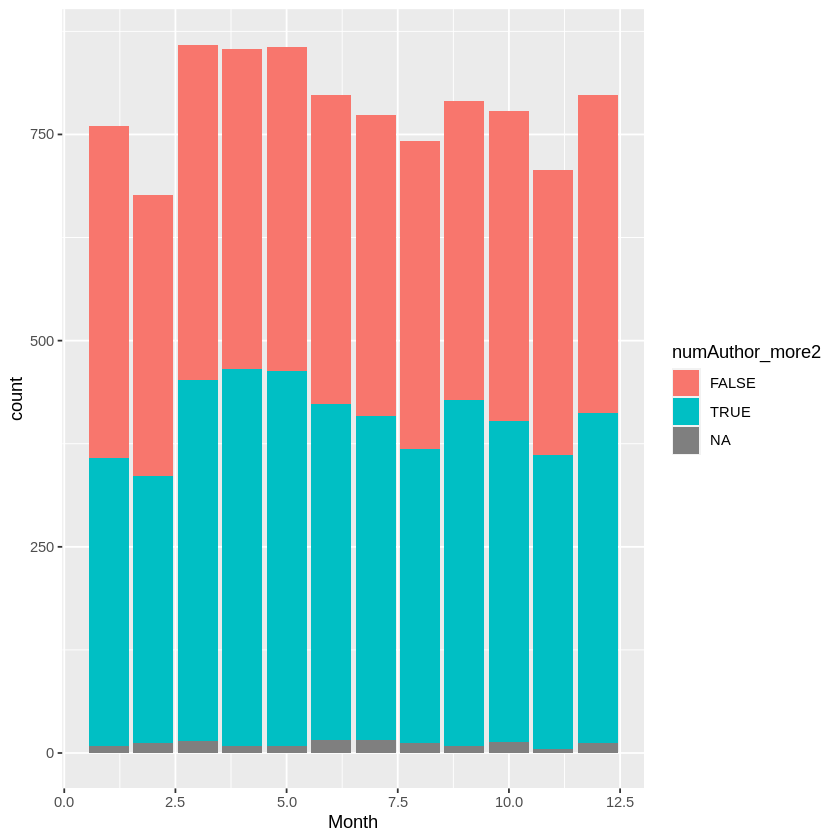

In [4]:
data <- mutate(data, "numAuthor_more2" = numAuthor>2)
ggplot(data = data) +
geom_bar(mapping = aes(x = Month,fill=numAuthor_more2))

Output:

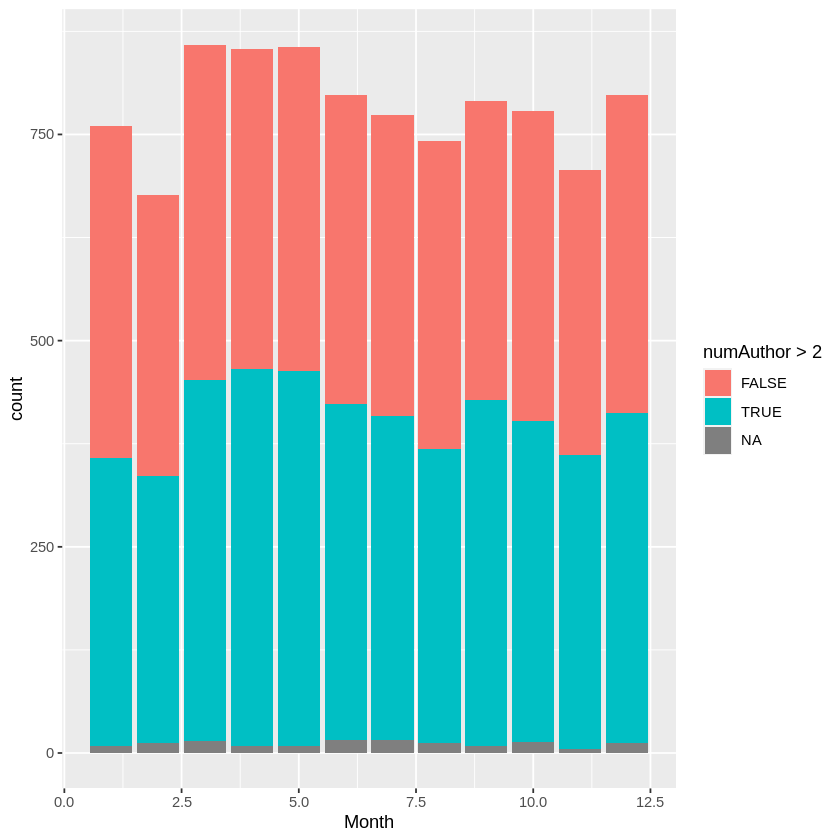

 2. Plot a histogram showing the number of articles published per month and year, with fill color determined by whether there are more than 2 authors 

Warning message in geom_bar(bins = 100):
“Ignoring unknown parameters: `bins`”


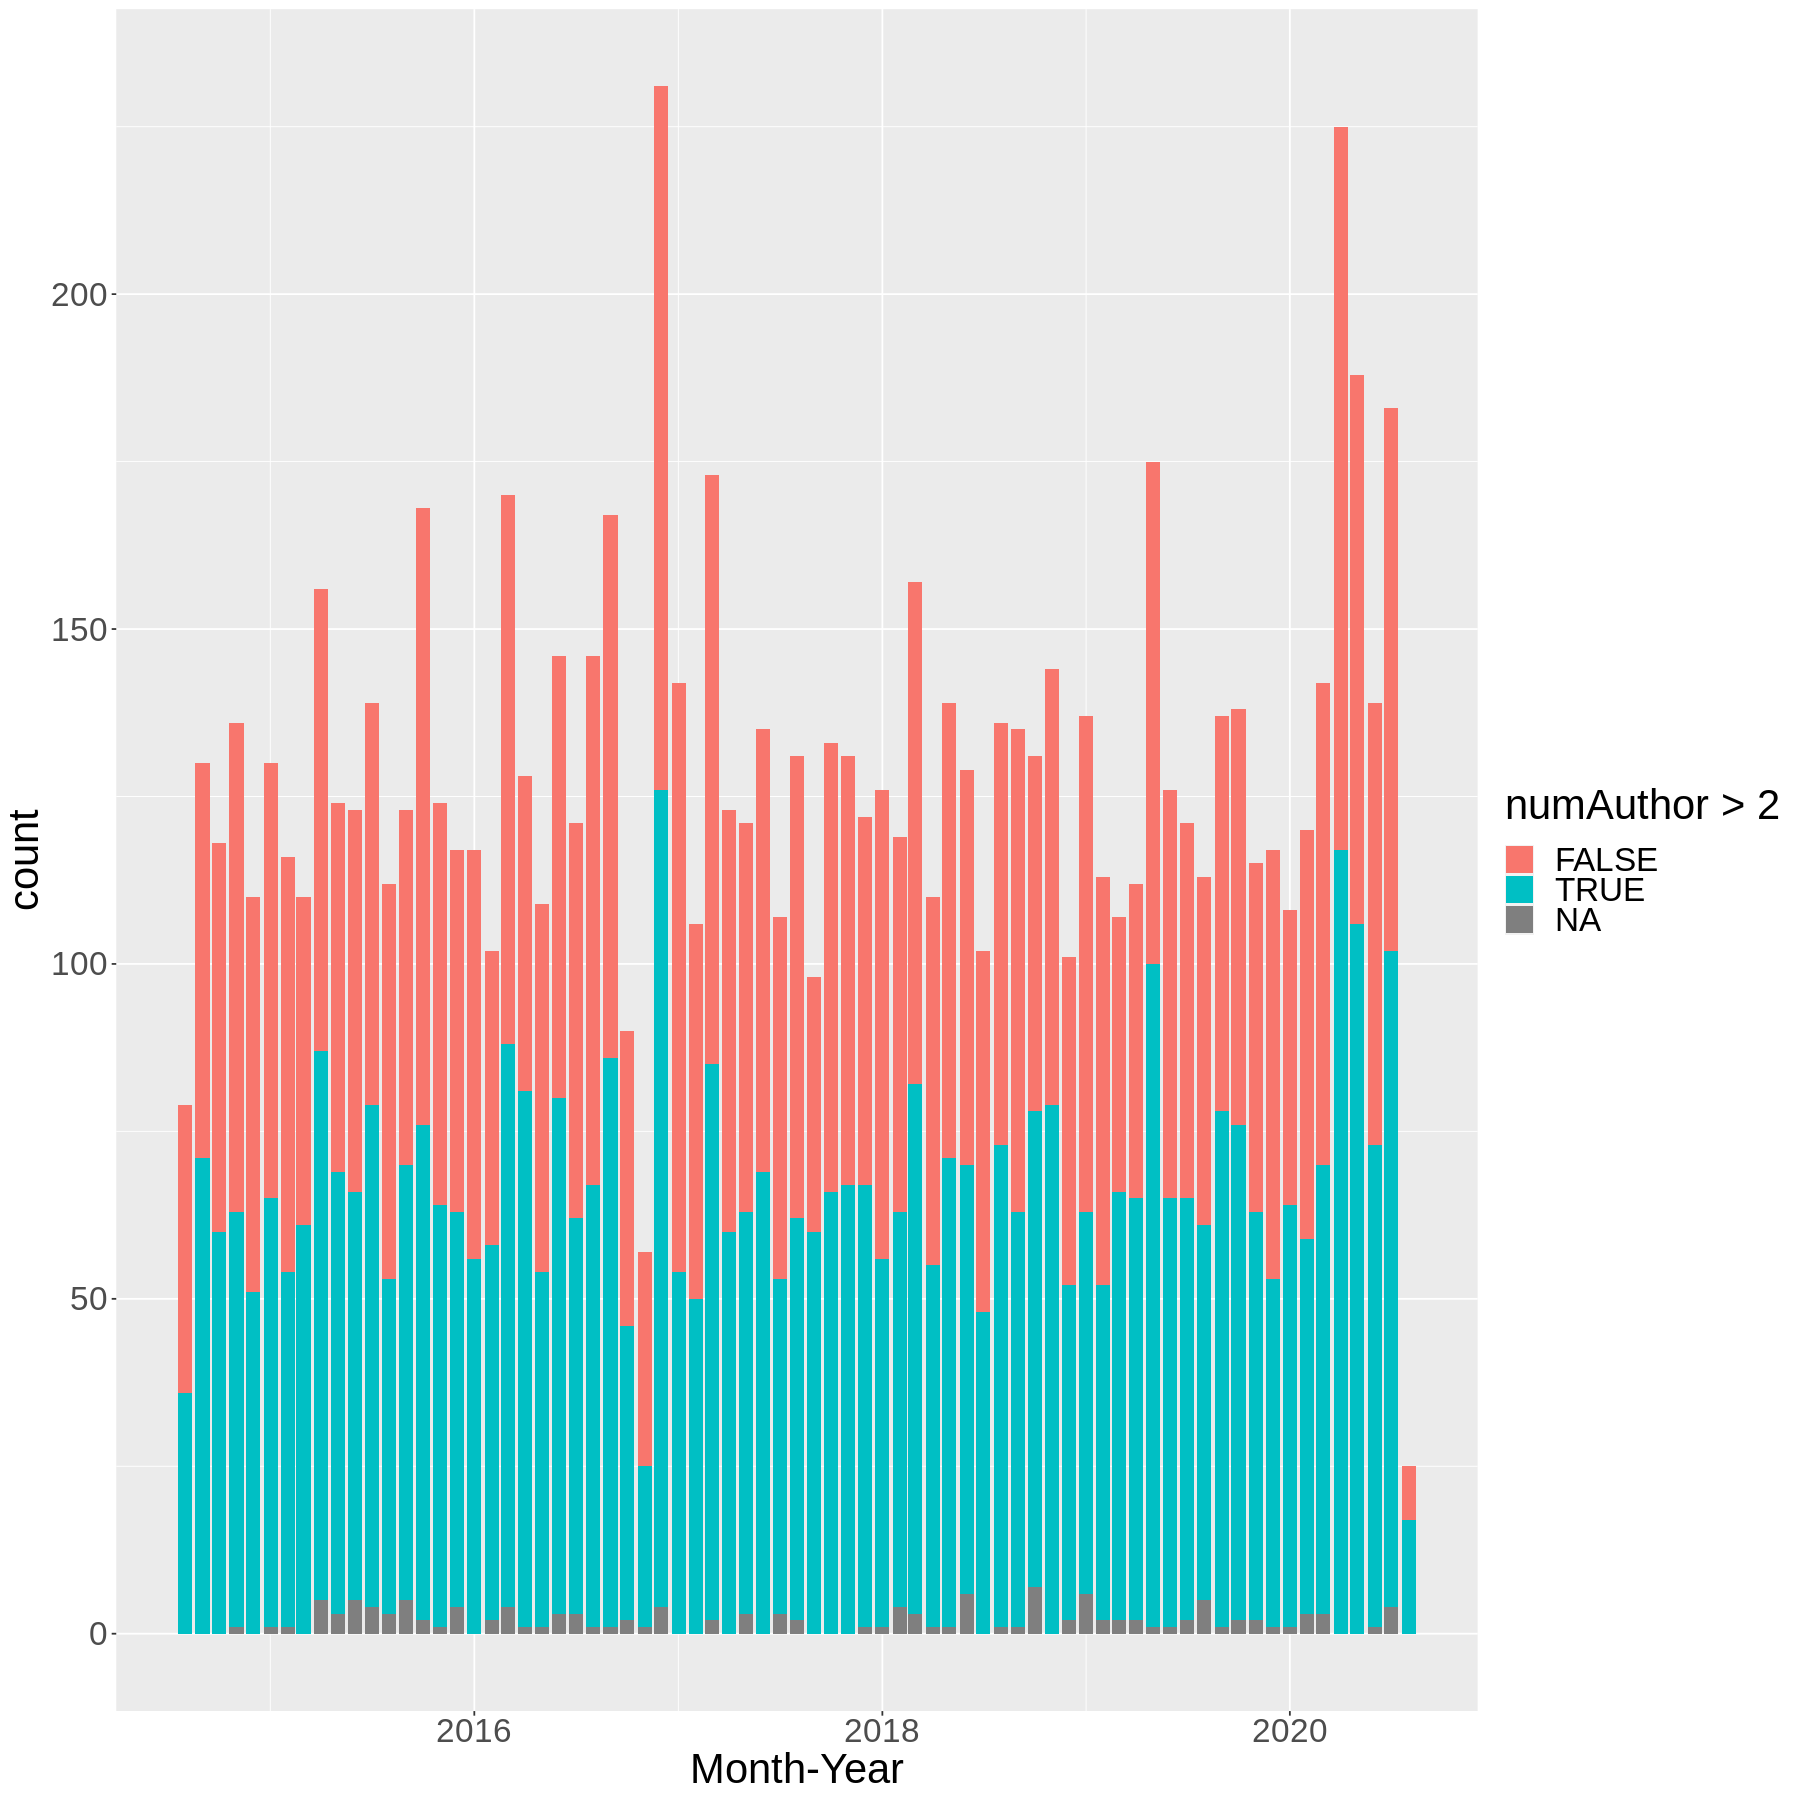

In [5]:
data$"month-chr" <- sprintf("%02d",data$Month)
data$"year-chr" <- sapply(data$Year,as.character)
data$'date' = paste(data$"year-chr",data$"month-chr", sep="")
data$'date'=paste(data$date,"01",sep="")
data$'fd'=as.Date(data$'date',format ="%Y%m%d")
options(repr.plot.width=15, repr.plot.height=15)
ggplot(data, aes(x=fd, fill=numAuthor_more2)) + 
  geom_bar(bins = 100)+ 
  xlab("Month-Year") + ylab("count")+
  scale_x_date()+
  guides(fill=guide_legend(title="numAuthor > 2"))+
  theme(text = element_text(size = 25))

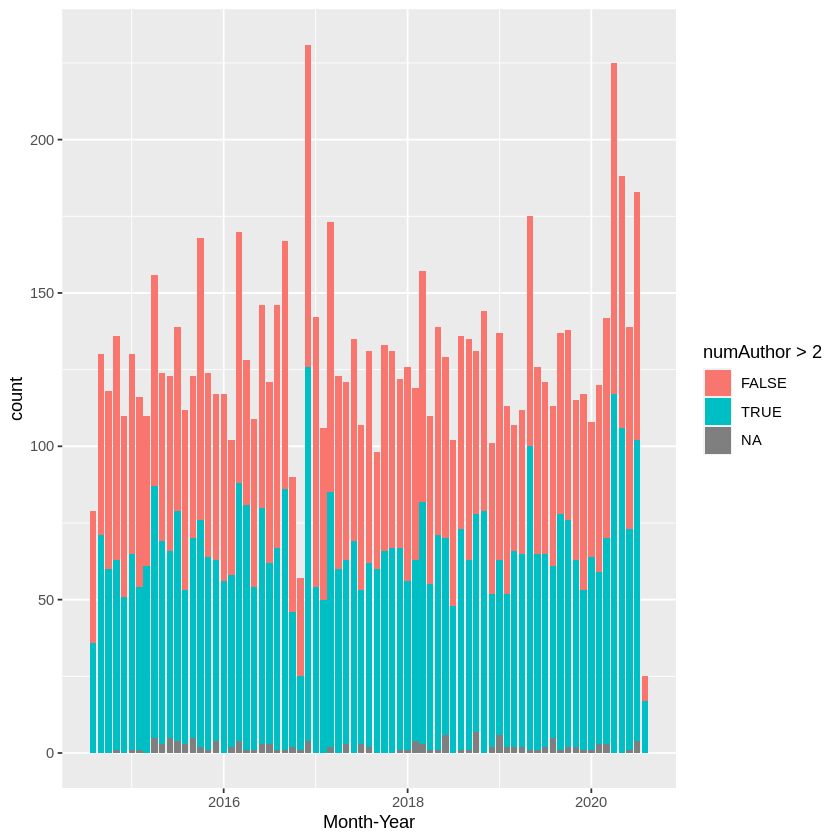

3. The first names need to be cleaned, they often include the first initial as well. Remove the initials and plot out the most common first names (with more than 30 mentions) in ascending order. 

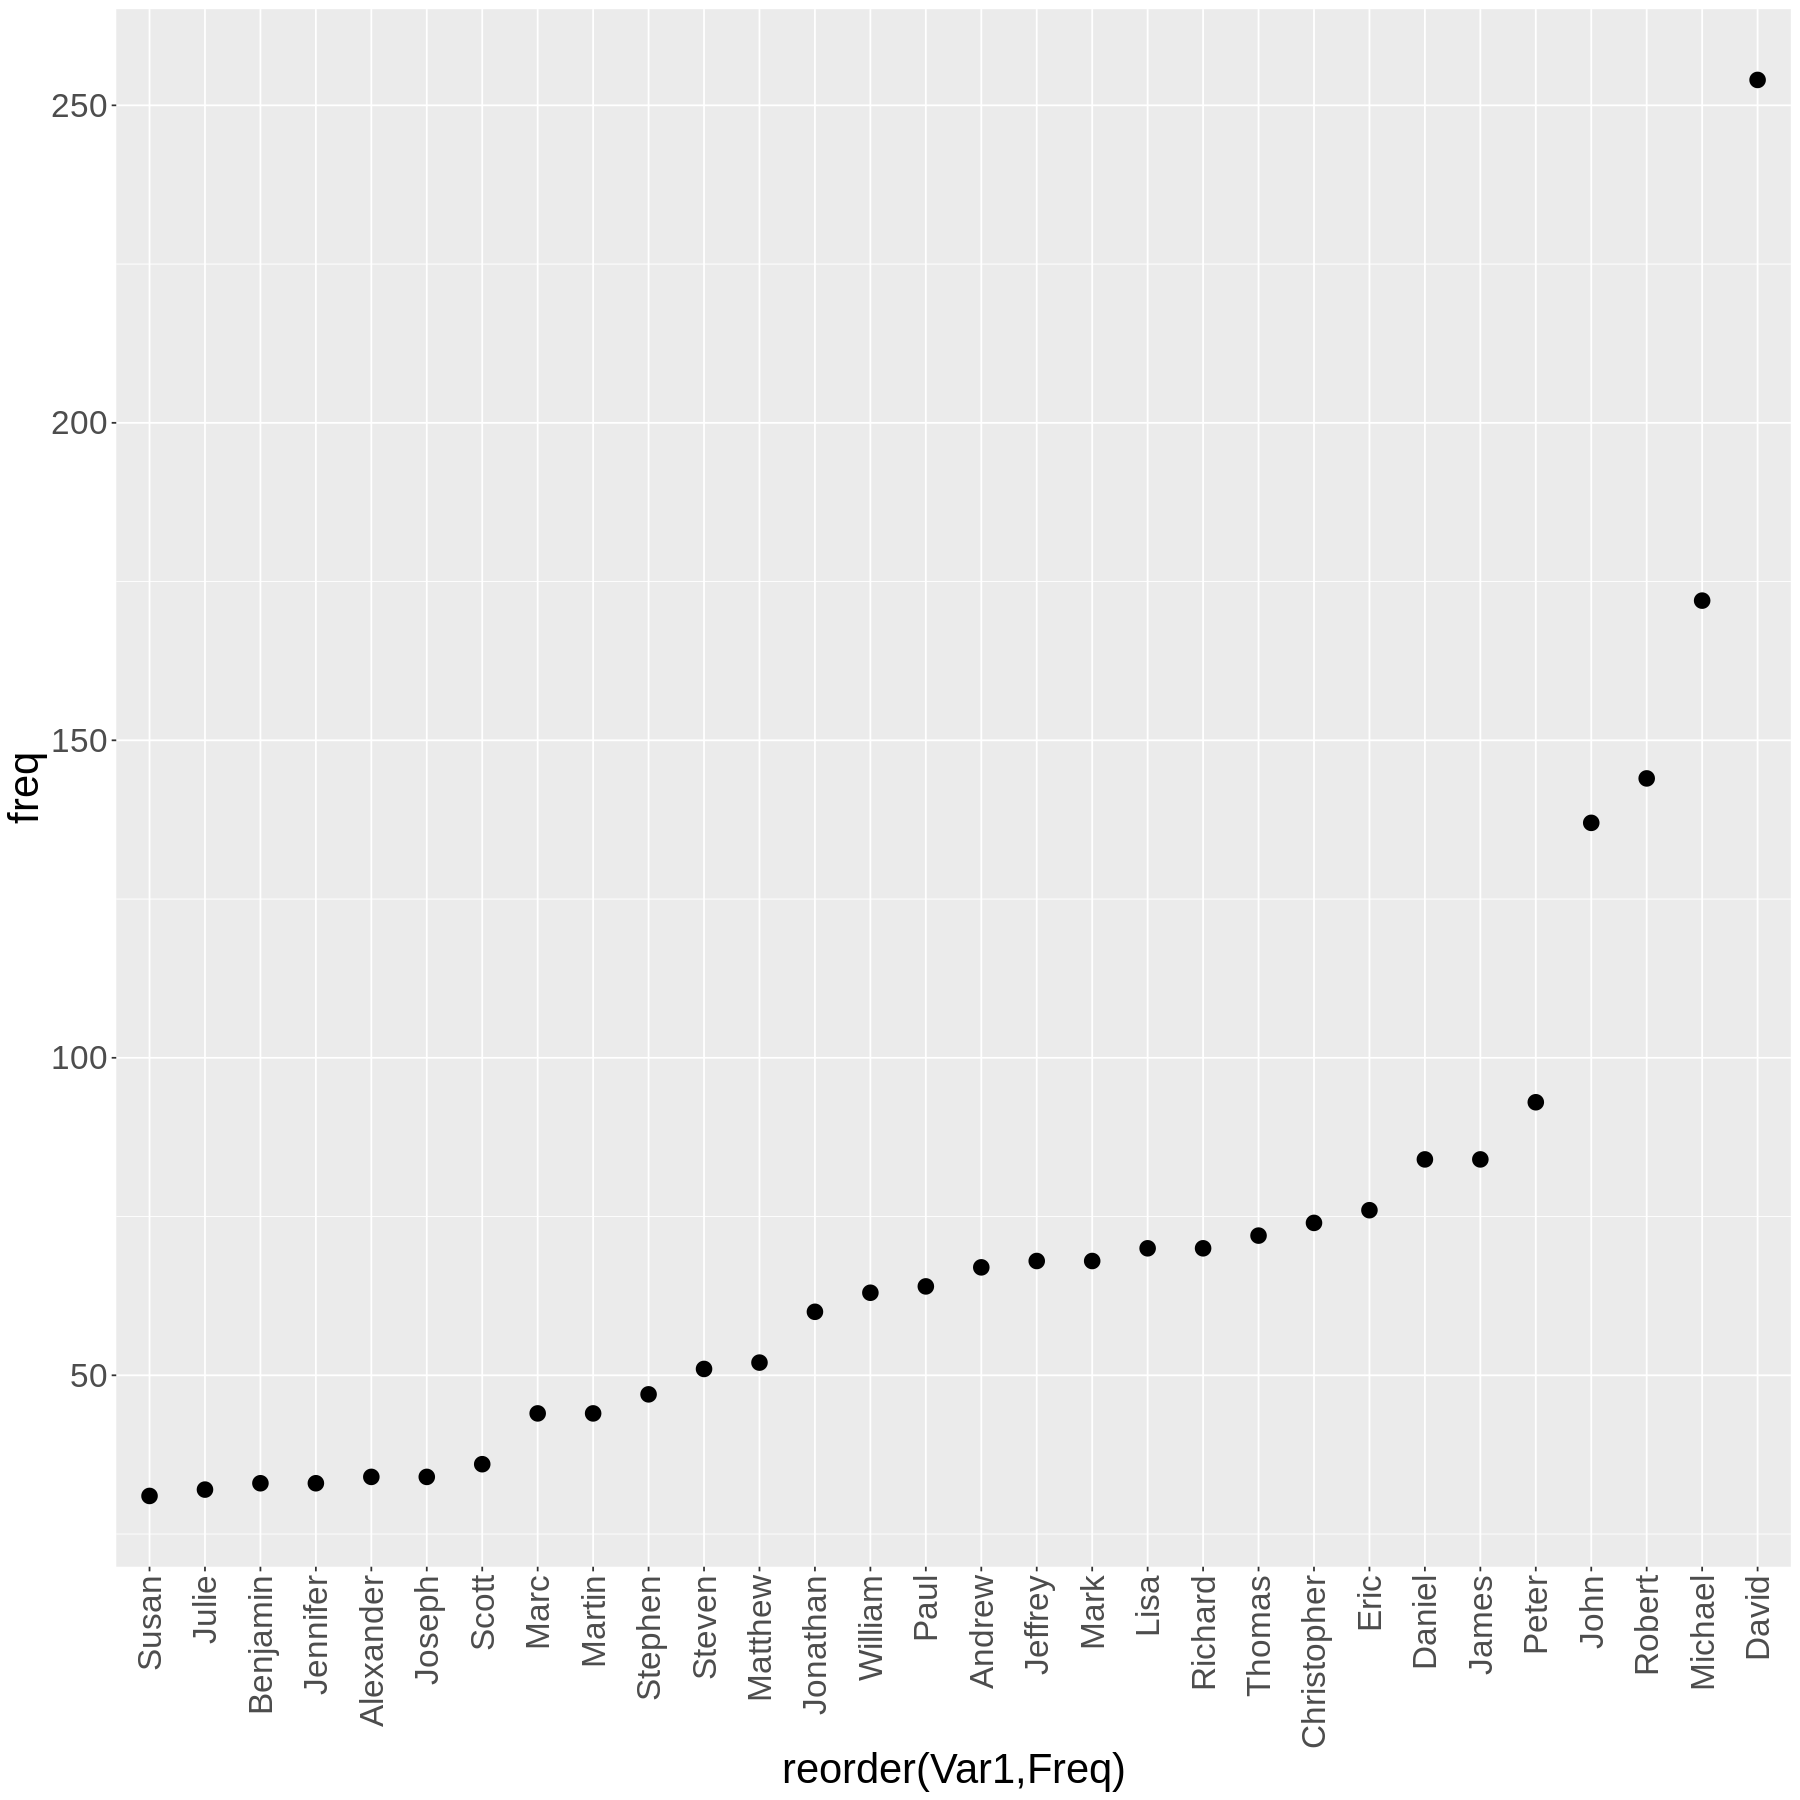

In [6]:
data$"firstAuthorF_cl"=lapply(data$firstAuthorF, function (x) {gsub(" .*", "", x)})
full_data=data[!is.na(data$firstAuthorF),]
full_data=as.data.frame(lapply(full_data, unlist))
Author_data = full_data%>%
group_by(firstAuthorF_cl) %>%
summarise(n = n())%>% subset(n>30)
ggplot(data = Author_data, mapping = aes(x = reorder(firstAuthorF_cl,n), y=n)) +
    geom_point(size=4)+
    theme(text = element_text(size = 25))+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    xlab("reorder(Var1,Freq)") + ylab("freq")


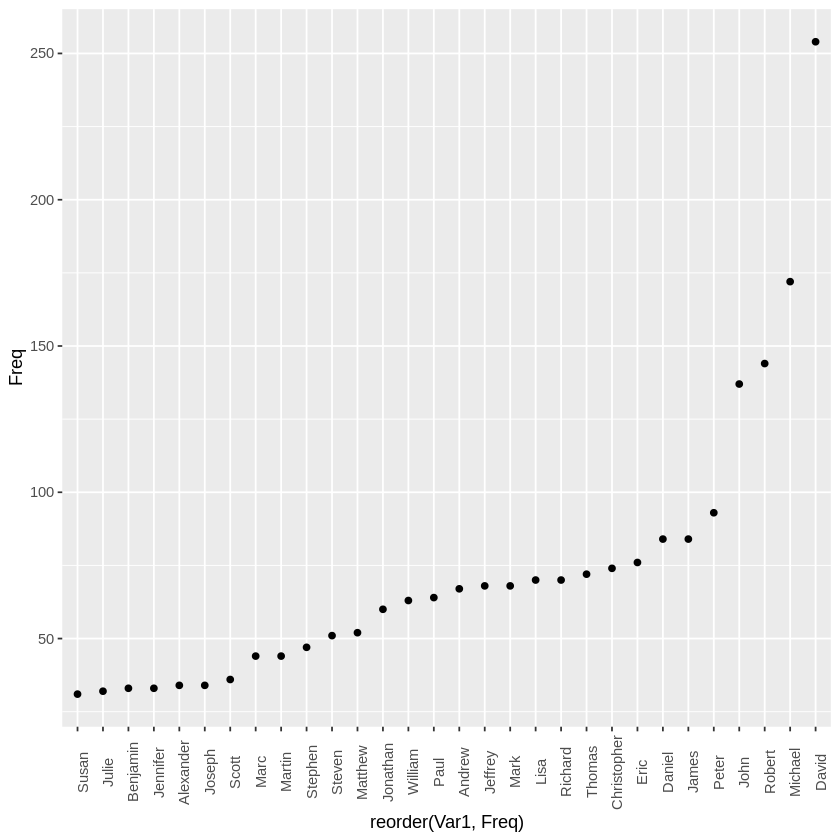

3. Plot a histogram where the fill is by whether it is the first instance of that first name (Red) or if it has been shown before (Blue). For example, if the first month authors are (Albert, Ben, Carl, David), then all four will be Red, but if the second month authors are (Albert, Ben, Ed, Frank) then half will be Red (Ed and Frank are new) and half will be Blue (Albert and Ben are old).   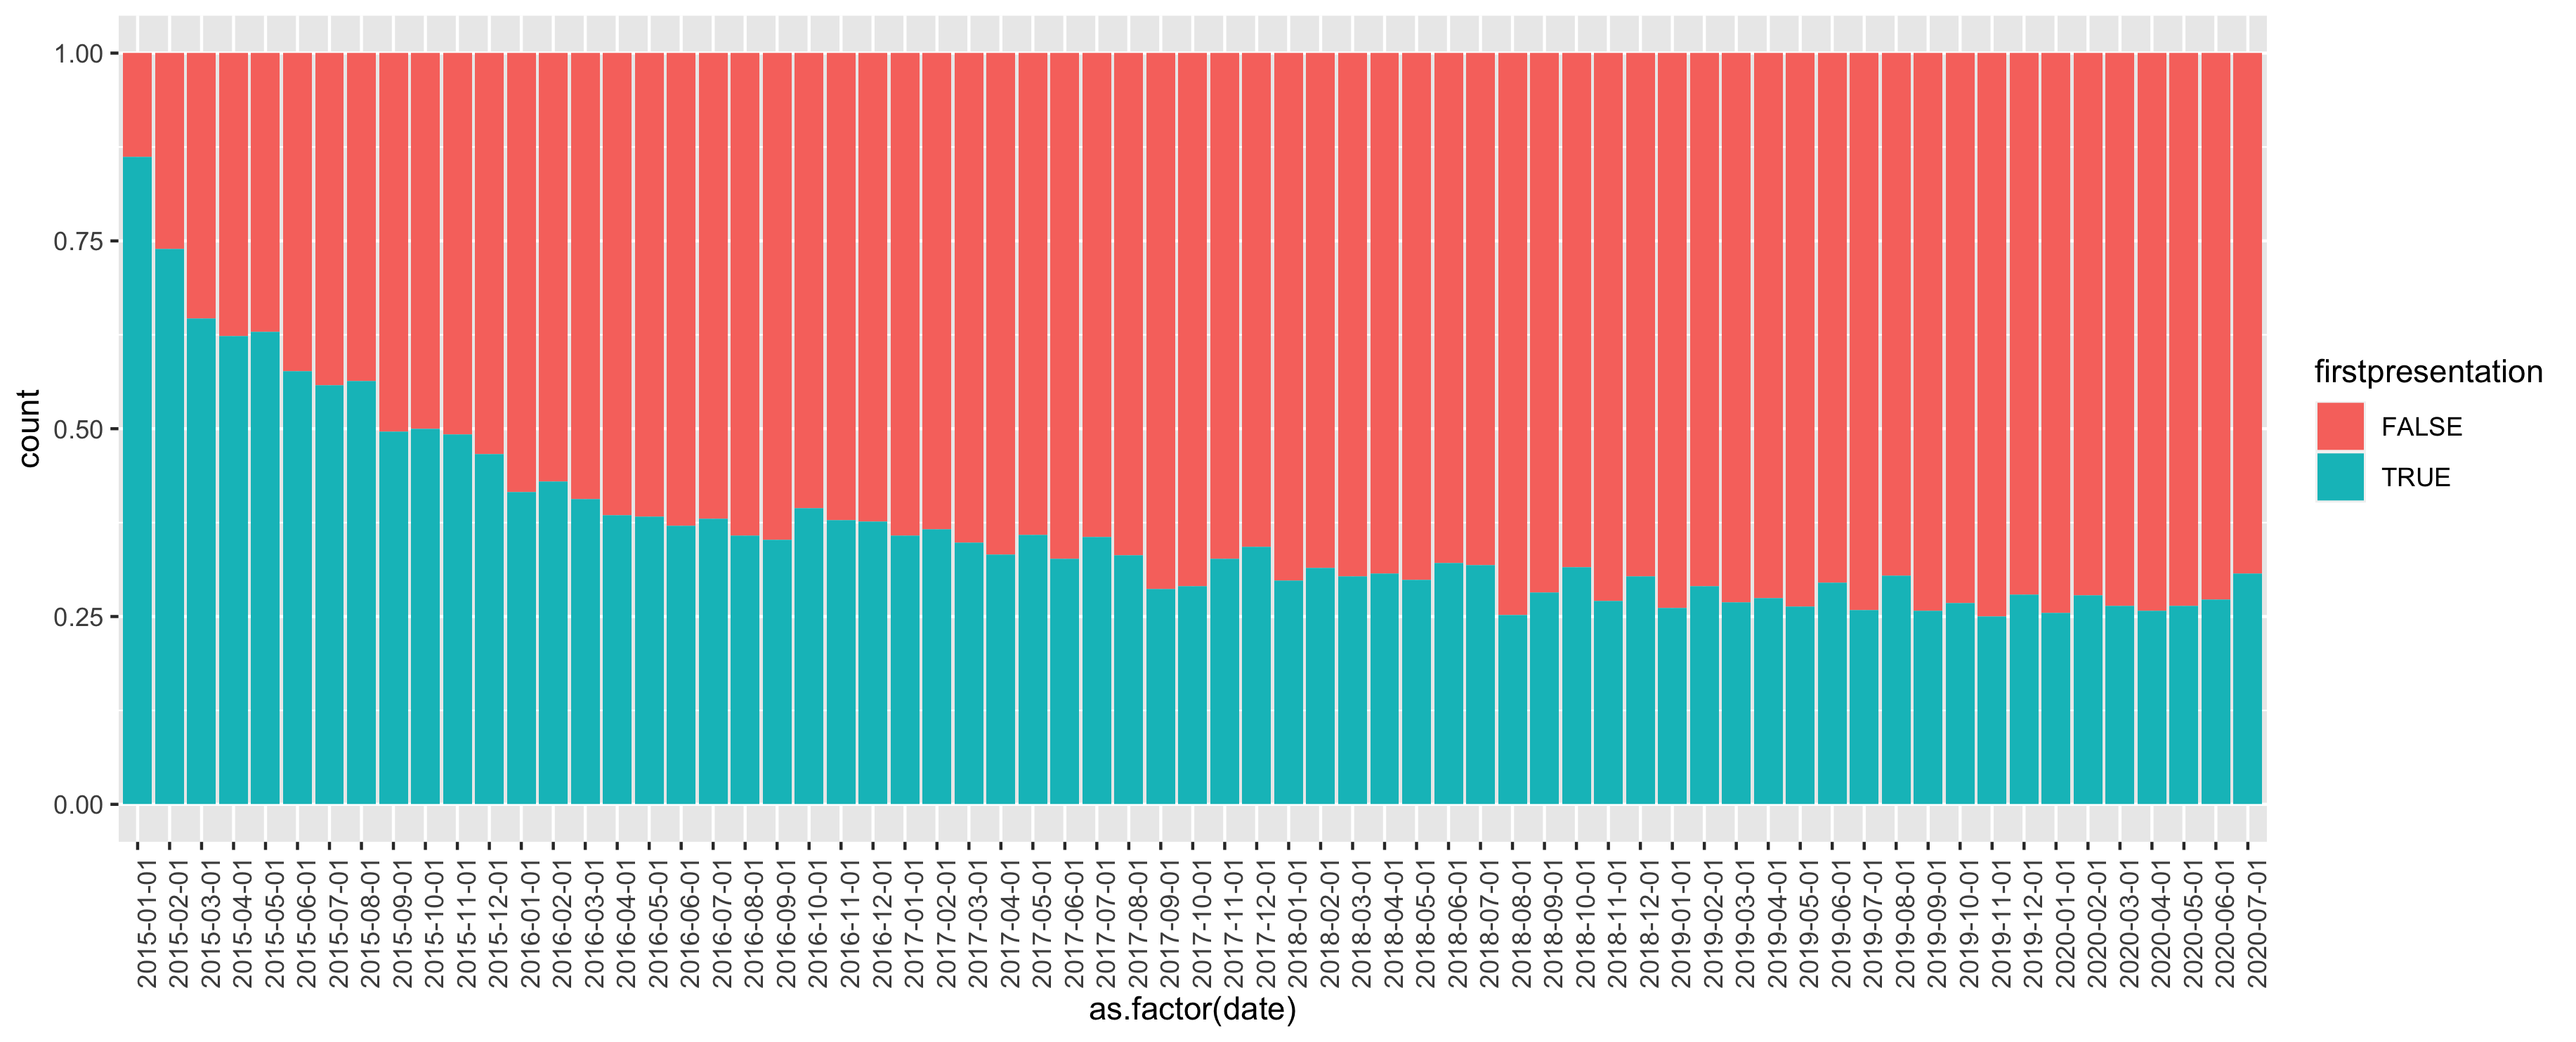


In [ ]:
##Create a copy of data in case we need:
data_ver2=data.frame(data)
 tracemem(data_ver2)==tracemem(data)

[1] FALSE

##  **First scenario** :Assuming that all authors are involved in the final plot ( not just first author). And also because of possibilty of counting the same first name for two different person , I made a new name variable combining first and last name. Although the graph starts from 2015-01-01, I included the data before this time too (example: the names of authord in 2015-02-01 is compared to the union of names in 2014 and 2015-01-01

tracemem[0x5567a64b7e00 -> 0x55679c298a00]: eval eval eval_with_user_handlers withVisible withCallingHandlers doTryCatch tryCatchOne tryCatchList tryCatch try handle timing_fn evaluate_call evaluate doTryCatch tryCatchOne tryCatchList doTryCatch tryCatchOne tryCatchList tryCatch <Anonymous> handle_shell <Anonymous> <Anonymous> 
tracemem[0x55679c298a00 -> 0x55679e073e00]: $<-.data.frame $<- eval eval eval_with_user_handlers withVisible withCallingHandlers doTryCatch tryCatchOne tryCatchList tryCatch try handle timing_fn evaluate_call evaluate doTryCatch tryCatchOne tryCatchList doTryCatch tryCatchOne tryCatchList tryCatch <Anonymous> handle_shell <Anonymous> <Anonymous> 


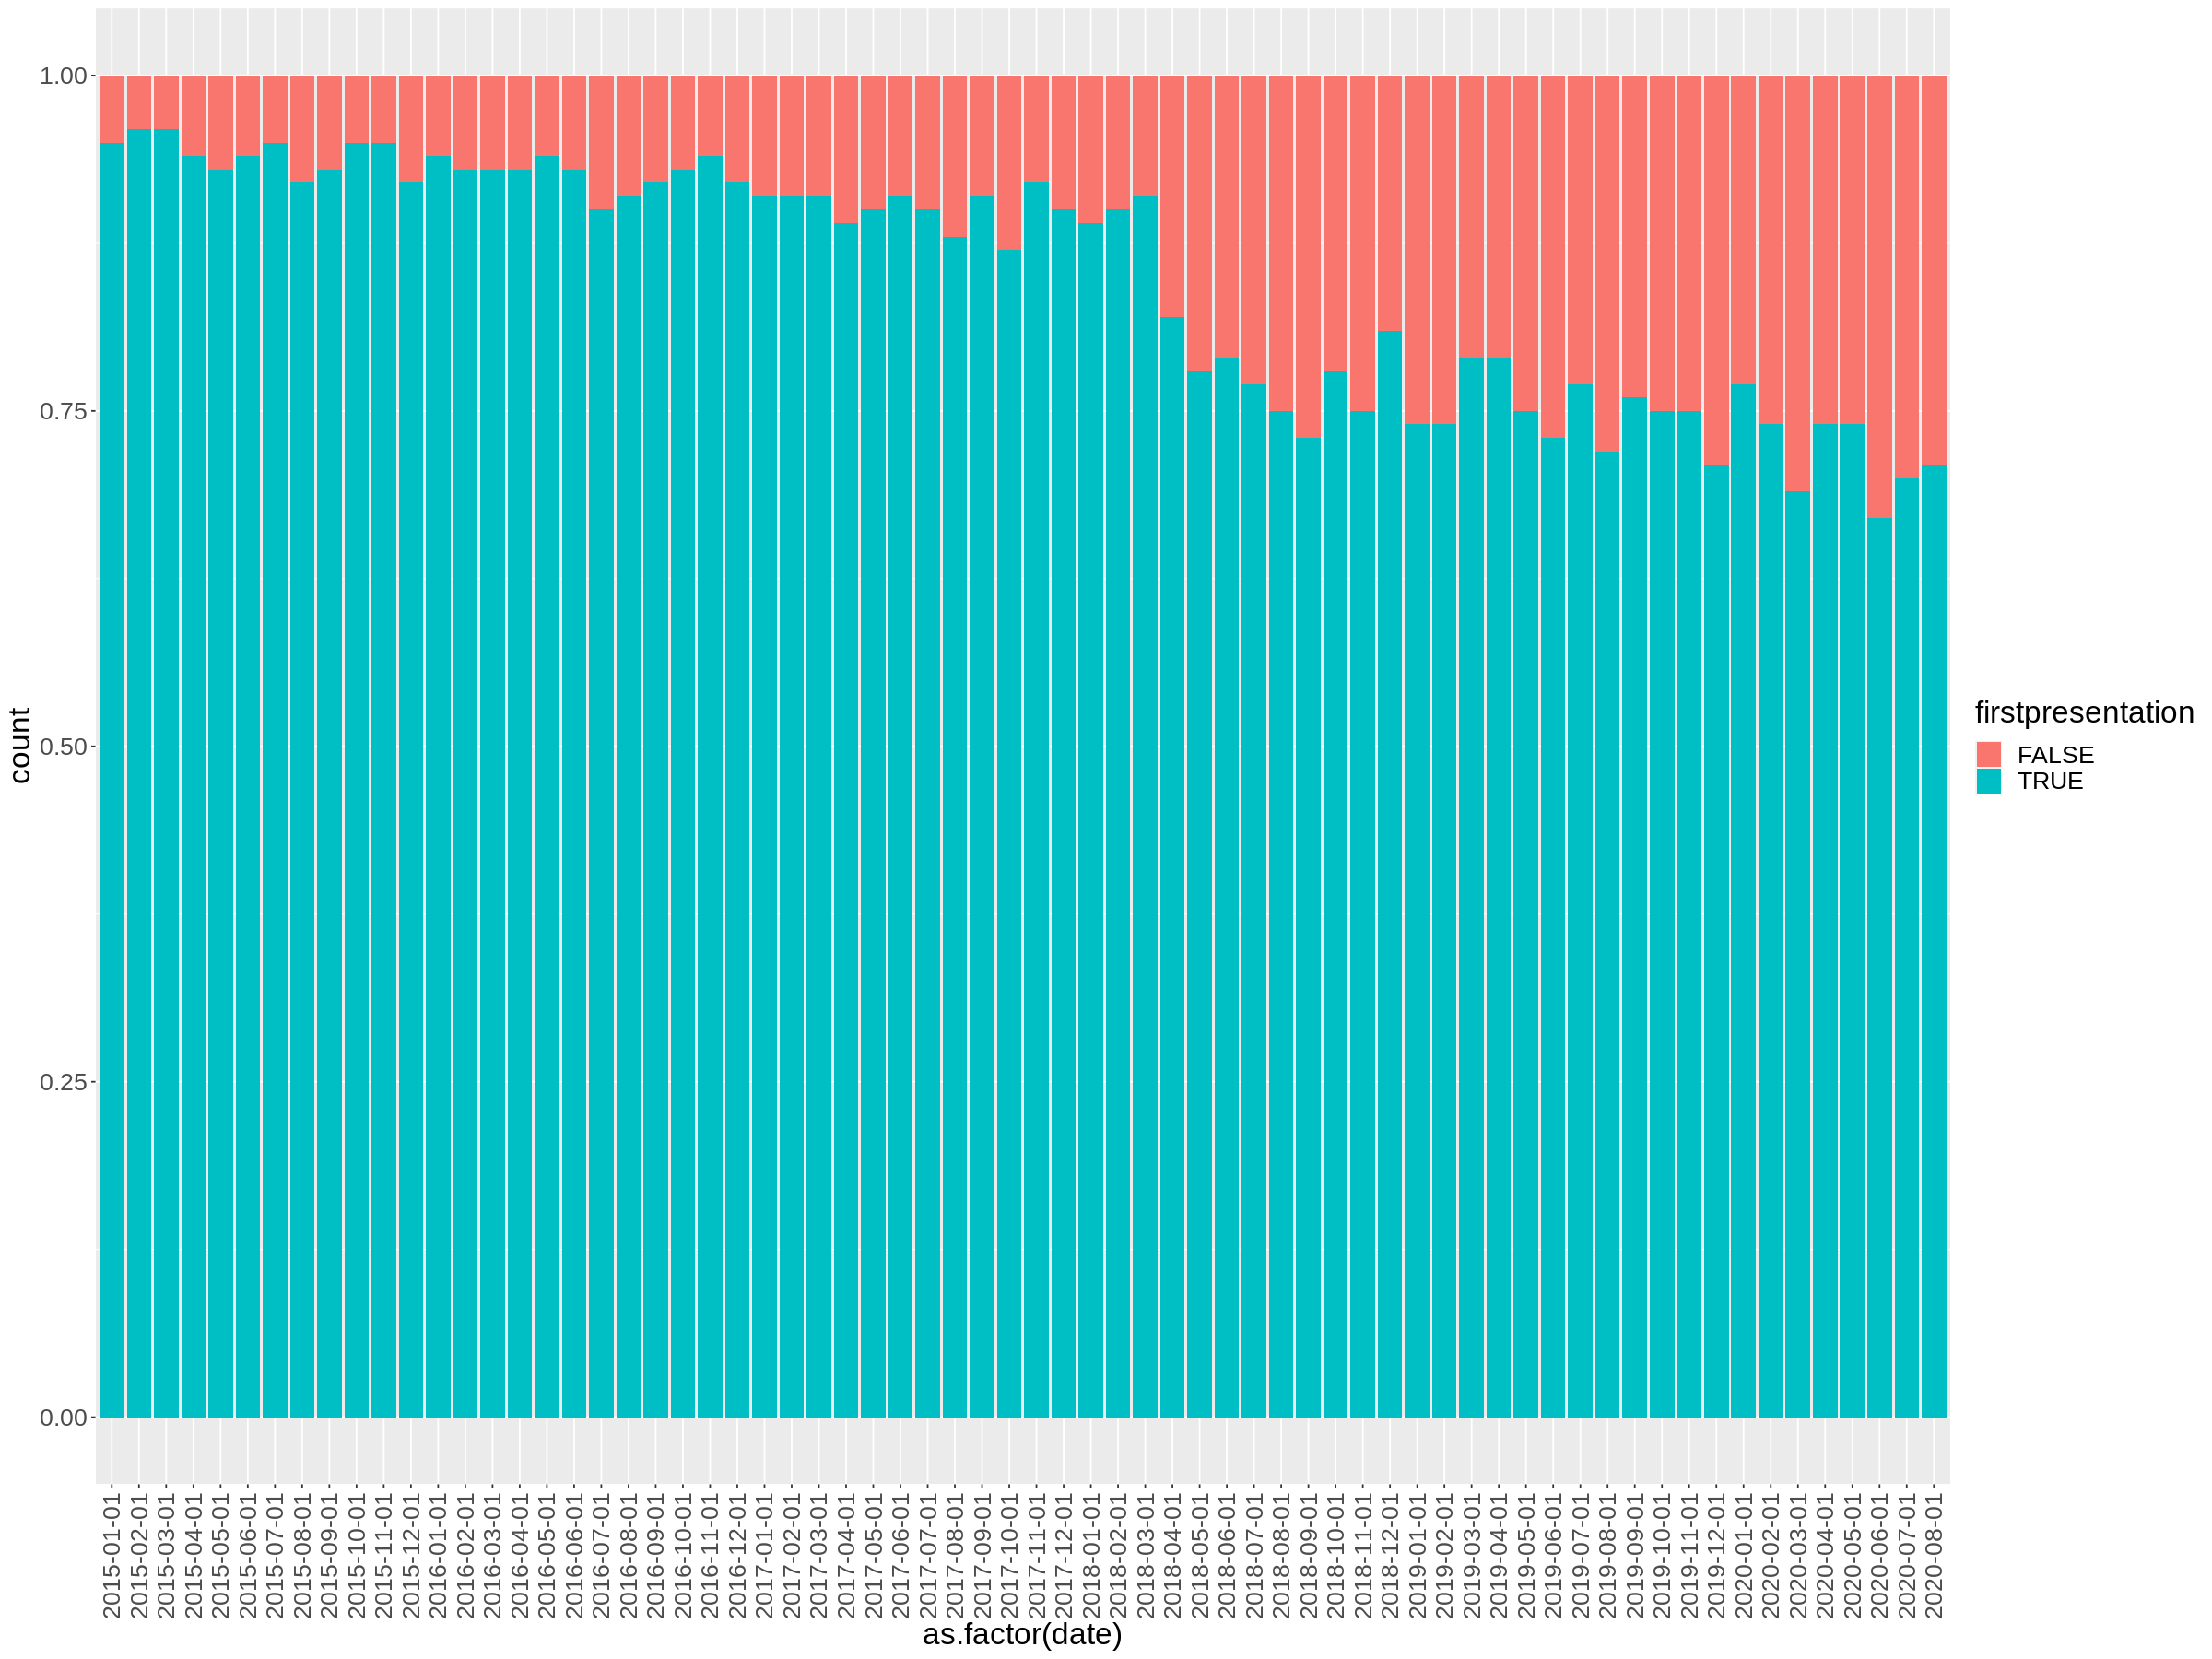

In [ ]:
#first author:
data$FA_full=paste(data$firstAuthorF,data$firstAuthorL,sep =" ")

#middle authors
data$MA_1=rep(NA,9391)
data[!is.na(data$midAuthorL1),]$MA_1=paste(data[!is.na(data$midAuthorF1),]$midAuthorF1, data[!is.na(data$midAuthorL1),]$midAuthorL1,sep =" ")

data$MA_2=rep(NA,9391)
data[!is.na(data$midAuthorL2),]$MA_2=paste(data[!is.na(data$midAuthorF2),]$midAuthorF2, data[!is.na(data$midAuthorL2),]$midAuthorL2,sep =" ")

data$MA_3=rep(NA,9391)
data[!is.na(data$midAuthorL3),]$MA_3=paste(data[!is.na(data$midAuthorF3),]$midAuthorF3, data[!is.na(data$midAuthorL3),]$midAuthorL3,sep =" ")

data$MA_4=rep(NA,9391)
data[!is.na(data$midAuthorL4),]$MA_4=paste(data[!is.na(data$midAuthorF4),]$midAuthorF4, data[!is.na(data$midAuthorL4),]$midAuthorL4,sep =" ")

data$MA_5=rep(NA,9391)
data[!is.na(data$midAuthorL5),]$MA_5=paste(data[!is.na(data$midAuthorF5),]$midAuthorF5, data[!is.na(data$midAuthorL5),]$midAuthorL5,sep =" ")
data$MA_6=rep(NA,9391)
data[!is.na(data$midAuthorL6),]$MA_6=paste(data[!is.na(data$midAuthorF6),]$midAuthorF6, data[!is.na(data$midAuthorL6),]$midAuthorL6,sep =" ")

data$MA_7=rep(NA,9391)
data[!is.na(data$midAuthorL7),]$MA_7=paste(data[!is.na(data$midAuthorF7),]$midAuthorF7, data[!is.na(data$midAuthorL7),]$midAuthorL7,sep =" ")

data$MA_8=rep(NA,9391)
data[!is.na(data$midAuthorL8),]$MA_8=paste(data[!is.na(data$midAuthorF8),]$midAuthorF8, data[!is.na(data$midAuthorL8),]$midAuthorL8,sep =" ")

data$MA_9=rep(NA,9391)
data[!is.na(data$midAuthorL9),]$MA_9=paste(data[!is.na(data$midAuthorF9),]$midAuthorF9, data[!is.na(data$midAuthorL9),]$midAuthorL9,sep =" ")

data$MA_10=rep(NA,9391)
data[!is.na(data$midAuthorL10),]$MA_10=paste(data[!is.na(data$midAuthorF10),]$midAuthorF10, data[!is.na(data$midAuthorL10),]$midAuthorL10,sep =" ")

data$MA_11=rep(NA,9391)
data[!is.na(data$midAuthorL11),]$MA_11=paste(data[!is.na(data$midAuthorF11),]$midAuthorF11, data[!is.na(data$midAuthorL11),]$midAuthorL11,sep =" ")

data$MA_12=rep(NA,9391)
data[!is.na(data$midAuthorL12),]$MA_12=paste(data[!is.na(data$midAuthorF12),]$midAuthorF12, data[!is.na(data$midAuthorL12),]$midAuthorL12,sep =" ")

data$MA_13=rep(NA,9391)
data[!is.na(data$midAuthorL13),]$MA_13=paste(data[!is.na(data$midAuthorF13),]$midAuthorF13, data[!is.na(data$midAuthorL13),]$midAuthorL13,sep =" ")

#corresponding author:
data$sr_name=rep(NA,9391)
data[!is.na(data$srAuthorL),]$sr_name=paste(data[!is.na(data$srAuthorF),]$srAuthorF, data[!is.na(data$srAuthorL),]$srAuthorL,sep =" ")

##reorder data in descending date
data=data[order(data$fd),]

###subset of all names for the whole 2014
sub2014=data[data$fd >= "2014-08-01" & data$fd <= "2014-12-01",]
names2014=c()
for (A in list('FA_full','MA_1','MA_2','MA_3','MA_4','MA_5','MA_6','MA_7','MA_8','MA_9','MA_10','MA_11','MA_12','MA_13','sr_name')){
  v=na.omit(sub2014[[A]])
  names2014=append(names2014,v)
} 
names2014=unique(names2014)

### for loop  for extracting names of each month except 2014 and putting it in a dataframe as a list, with column names "dates" 
#and "names" (all the names in that date inside a list) and later proprtion of new author:
df= data.frame(dates= seq(as.Date("2015-01-01"),as.Date("2020-08-01"),by = "1 month"), names=rep(1,68))
for( time in as.character(seq(as.Date("2015-01-01"),as.Date("2020-08-01"),by = "1 month"))){
  #print(time)
  n=c()
  for (A in list('FA_full','MA_1','MA_2','MA_3','MA_4','MA_5','MA_6','MA_7',
  'MA_8','MA_9','MA_10','MA_11','MA_12','MA_13','sr_name')){
    #print(A)################################################
      v=na.omit(data[data$fd==time,][[A]])
      n=append(n,v)
      #print(n)
  df[df$dates==time,]$names=list(n)
} 
}
#make new cloumns for proportions defaulted to zero for now:
df$prop_new=rep(0,68)
df$prop_rep=rep(0,68)

##assuming that the names list must be unique and we dont calculate the repititive names in proportion!!!
#because "setdiff()" makes a nuique vector 
whole=as.vector(names2014)
for (date in df$dates){
  current_name=as.vector(unlist(df[df$date==date,]$names))
  diff=setdiff(current_name,whole)
  whole=union(current_name,whole)
  df[df$dates==date,]$prop_new=round(length(diff)/length(current_name),2)
  df[df$dates==date,]$prop_rep=round(1-(length(diff)/length(current_name)),2)

  
}

#subset of df with proportion of new names /t_f : is a new colum indicting wether it appeared new (TRUE) or not (FALSE)
true_df=df[,c("dates","prop_new")]
true_df$t_f=rep(TRUE,68)
colnames(true_df)[2]="prop"
#subset of df with proportion of repetitive (not new) names
false_df=df[,c("dates","prop_rep")]
false_df$t_f=rep(FALSE,68)
colnames(false_df)[2]="prop"

##combining the above "true_df" and "false_df" to get final_df:
final_data=rbind(true_df,false_df)
final_data=final_data[order(final_data$dates	),]
#for visulization purpose we need to convert date to factor:
final_data$dates=as.factor(final_data$dates)
#and plot it!
options(repr.plot.width=20, repr.plot.height=15)
ggplot(final_data, aes(x = dates, y = prop, fill = t_f)) +
  geom_bar(stat = "identity", position = "stack")+
    theme(text = element_text(size = 20))+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    xlab("as.factor(date)") + ylab("count")+
    guides(fill=guide_legend(title="firstpresentation"))


# 2-**Second Scenario**: Same as above with the difference that I did not make new name variable and only relied on the first name of all authors including  (first author , middle authors and corresponding author.

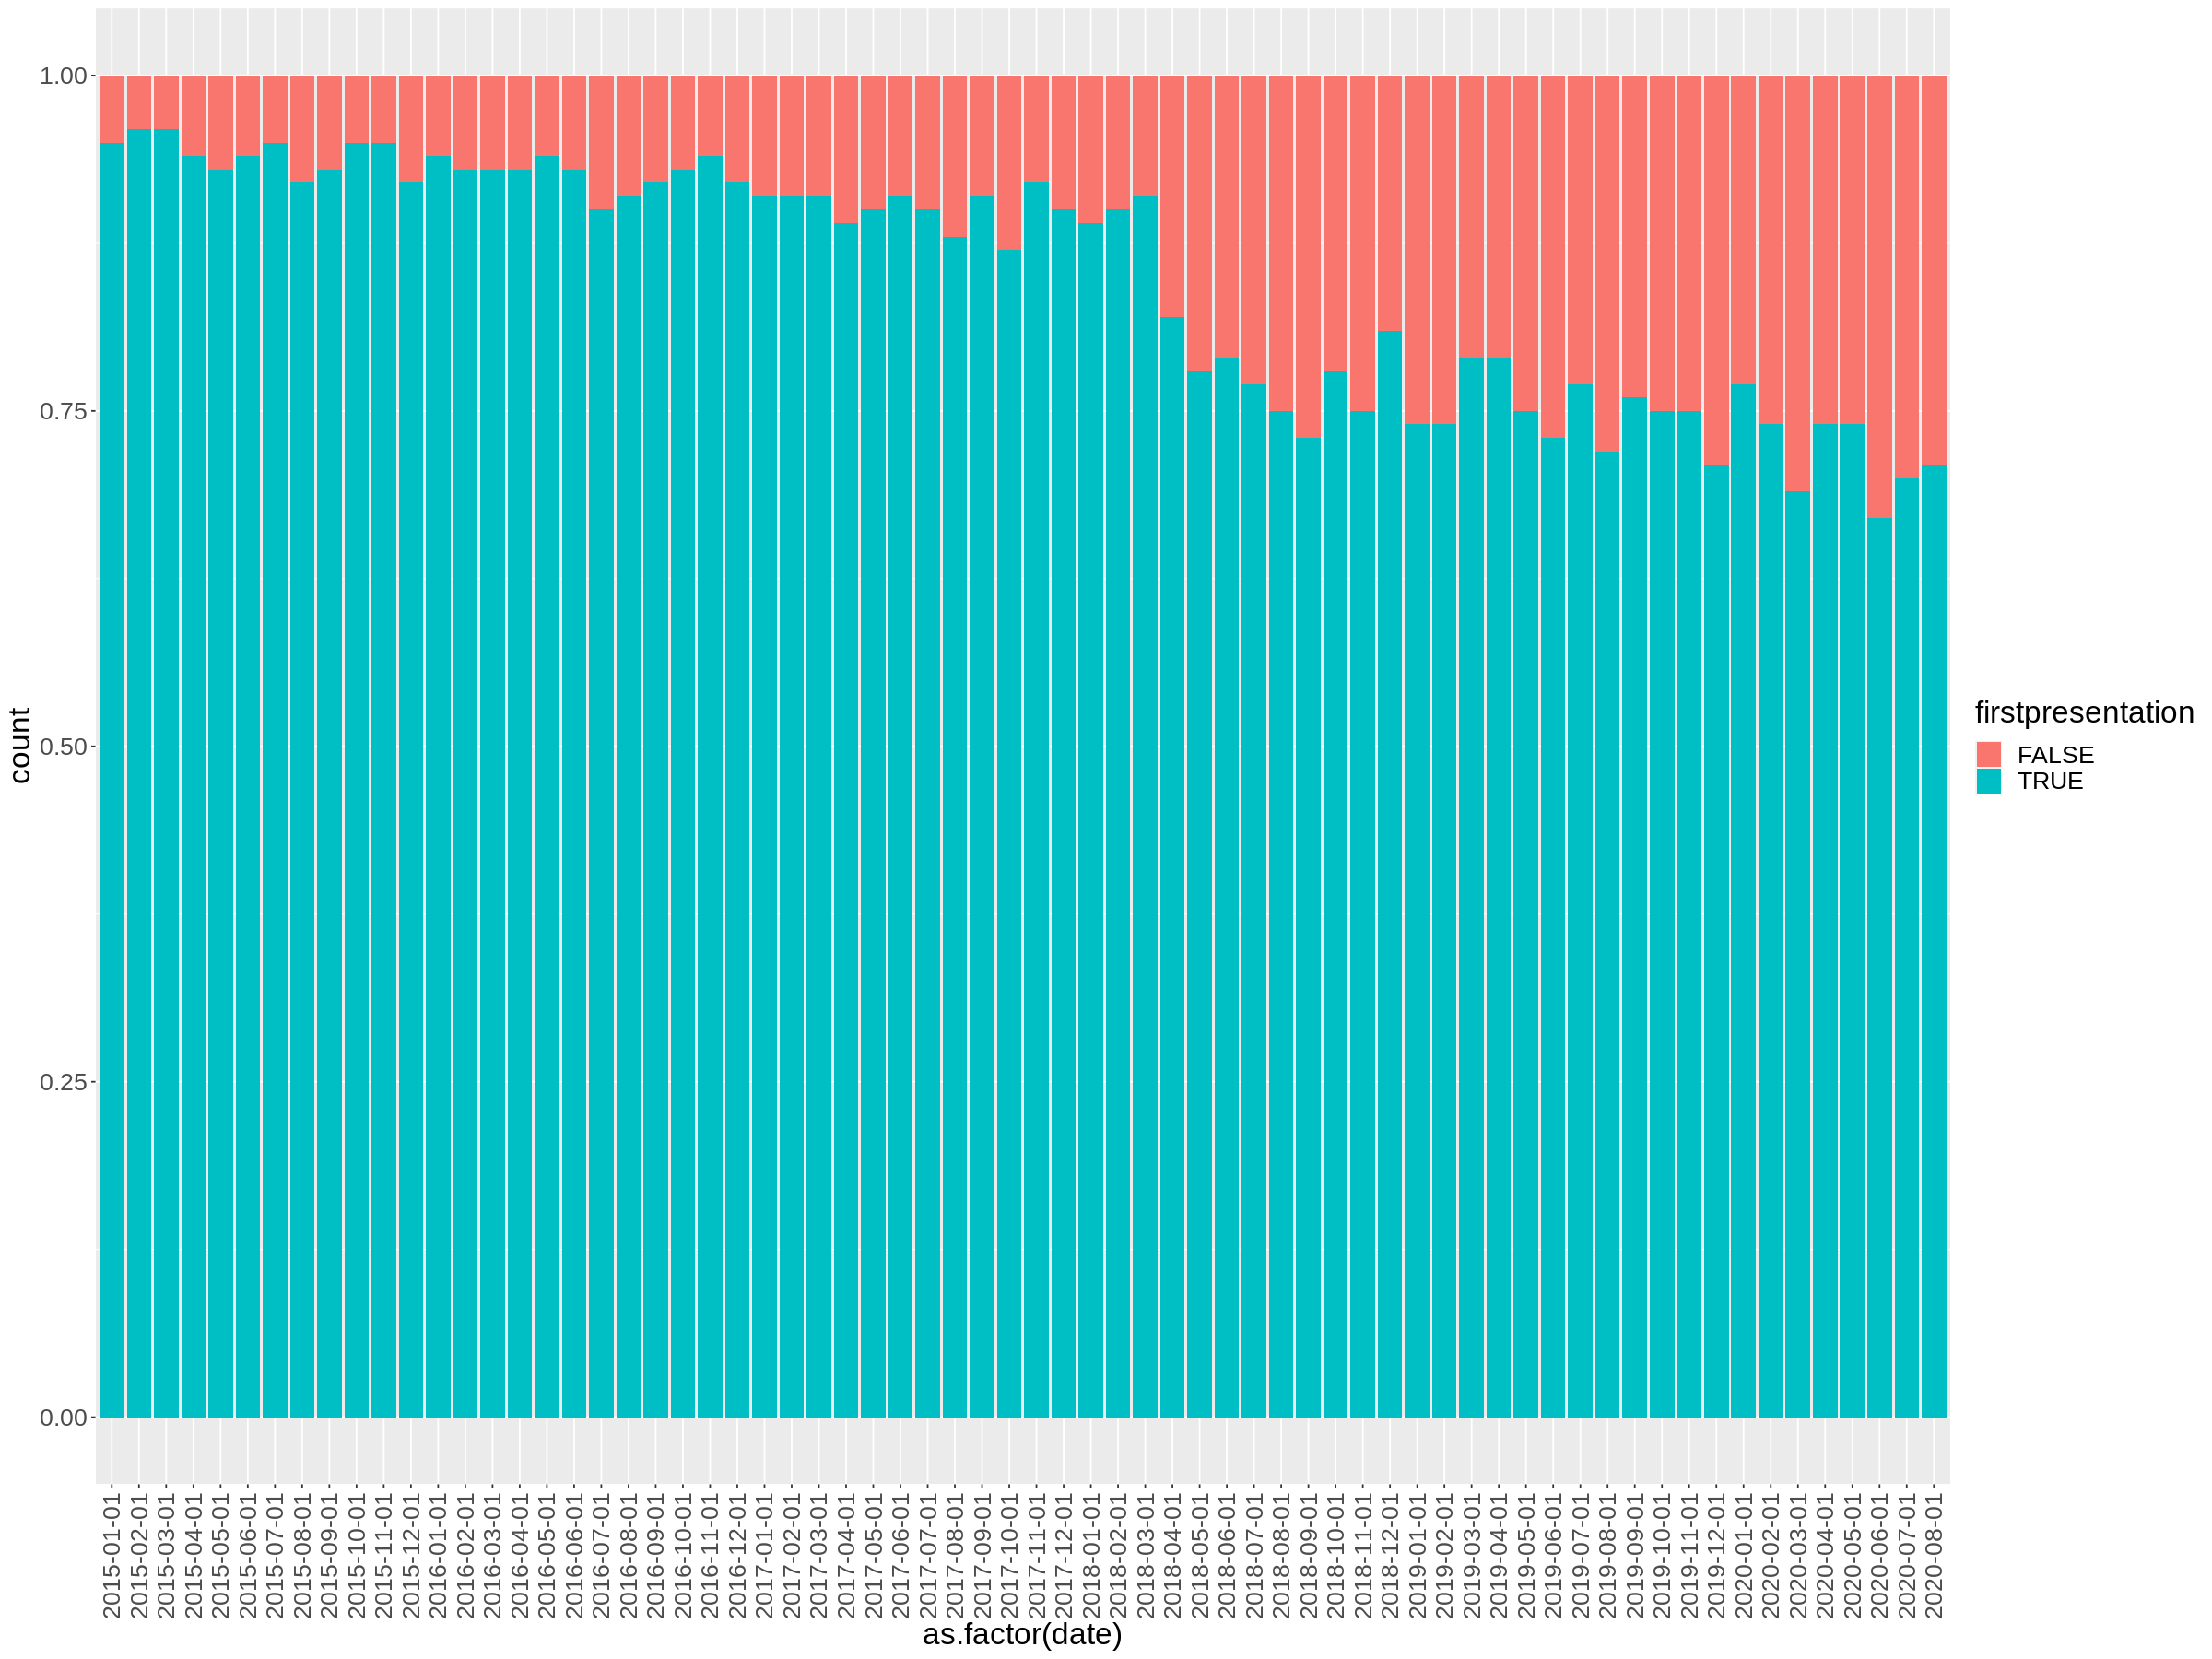

In [ ]:
###subset of all first names (not concatenated last name)  for the whole 2014
sub2014_2=data[data$fd >= "2014-08-01" & data$fd <= "2014-12-01",]
names2014_2=c()
for (A in list('firstAuthorF','midAuthorF1','midAuthorF2','midAuthorF3','midAuthorF4','midAuthorF5',
'midAuthorF6','midAuthorF7','midAuthorF8','midAuthorF9','midAuthorF10','midAuthorF11','midAuthorF12','midAuthorF13','srAuthorF')){
  v=na.omit(names2014_2[[A]])
  names2014_2=append(names2014_2,v)
} 
names2014_2=unique(names2014)

### for loop  for extracting names of each month except 2014 and putting it in a dataframe as a list, with column names "dates" 
#and "names" (all the names in that date inside a list) and later proprtion of new author:
df2= data.frame(dates= seq(as.Date("2015-01-01"),as.Date("2020-08-01"),by = "1 month"), names=rep(1,68))
for( time in as.character(seq(as.Date("2015-01-01"),as.Date("2020-08-01"),by = "1 month"))){
  #print(time)
  n=c()
  for (A in list('firstAuthorF','midAuthorF1','midAuthorF2','midAuthorF3','midAuthorF4','midAuthorF5',
'midAuthorF6','midAuthorF7','midAuthorF8','midAuthorF9','midAuthorF10','midAuthorF11','midAuthorF12','midAuthorF13','srAuthorF')){
    #print(A)################################################
      v=na.omit(data[data$fd==time,][[A]])
      n=append(n,v)
      #print(n)
  df2[df2$dates==time,]$names=list(n)
} 
}
#make new cloumns for proportions defaulted to zero for now:
df2$prop_new=rep(0,68)
df2$prop_rep=rep(0,68)

##assuming that the names list must be unique and we dont calculate the repititive names in proportion!!!
#because "setdiff()" makes a nuique vector 
whole=as.vector(names2014_2)
for (date in df2$dates){
  current_name=as.vector(unlist(df2[df2$date==date,]$names))
  diff=setdiff(current_name,whole)
  whole=union(current_name,whole)
  df2[df2$dates==date,]$prop_new=round(length(diff)/length(current_name),2)
  df2[df2$dates==date,]$prop_rep=round(1-(length(diff)/length(current_name)),2)

  
}

#subset of df with proportion of new names /t_f : is a new colum indicting wether it appeared new (TRUE) or not (FALSE)
true_df_2=df[,c("dates","prop_new")]
true_df_2$t_f=rep(TRUE,68)
colnames(true_df_2)[2]="prop"
#subset of df with proportion of repetitive (not new) names
false_df_2=df[,c("dates","prop_rep")]
false_df_2$t_f=rep(FALSE,68)
colnames(false_df_2)[2]="prop"

##combining the above "true_df" and "false_df" to get final_df:
final_data2=rbind(true_df_2,false_df_2)
final_data2=final_data2[order(final_data2$dates	),]
#for visulization purpose we need to convert date to factor:
final_data2$dates=as.factor(final_data2$dates)
#and plot it!
options(repr.plot.width=20, repr.plot.height=15)
ggplot(final_data2, aes(x = dates, y = prop, fill = t_f)) +
  geom_bar(stat = "identity", position = "stack")+
    theme(text = element_text(size = 20))+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    xlab("as.factor(date)") + ylab("count")+
    guides(fill=guide_legend(title="firstpresentation"))



# 3- Third scenario :Assuming only first Author scenario ( only first author names are visulized)

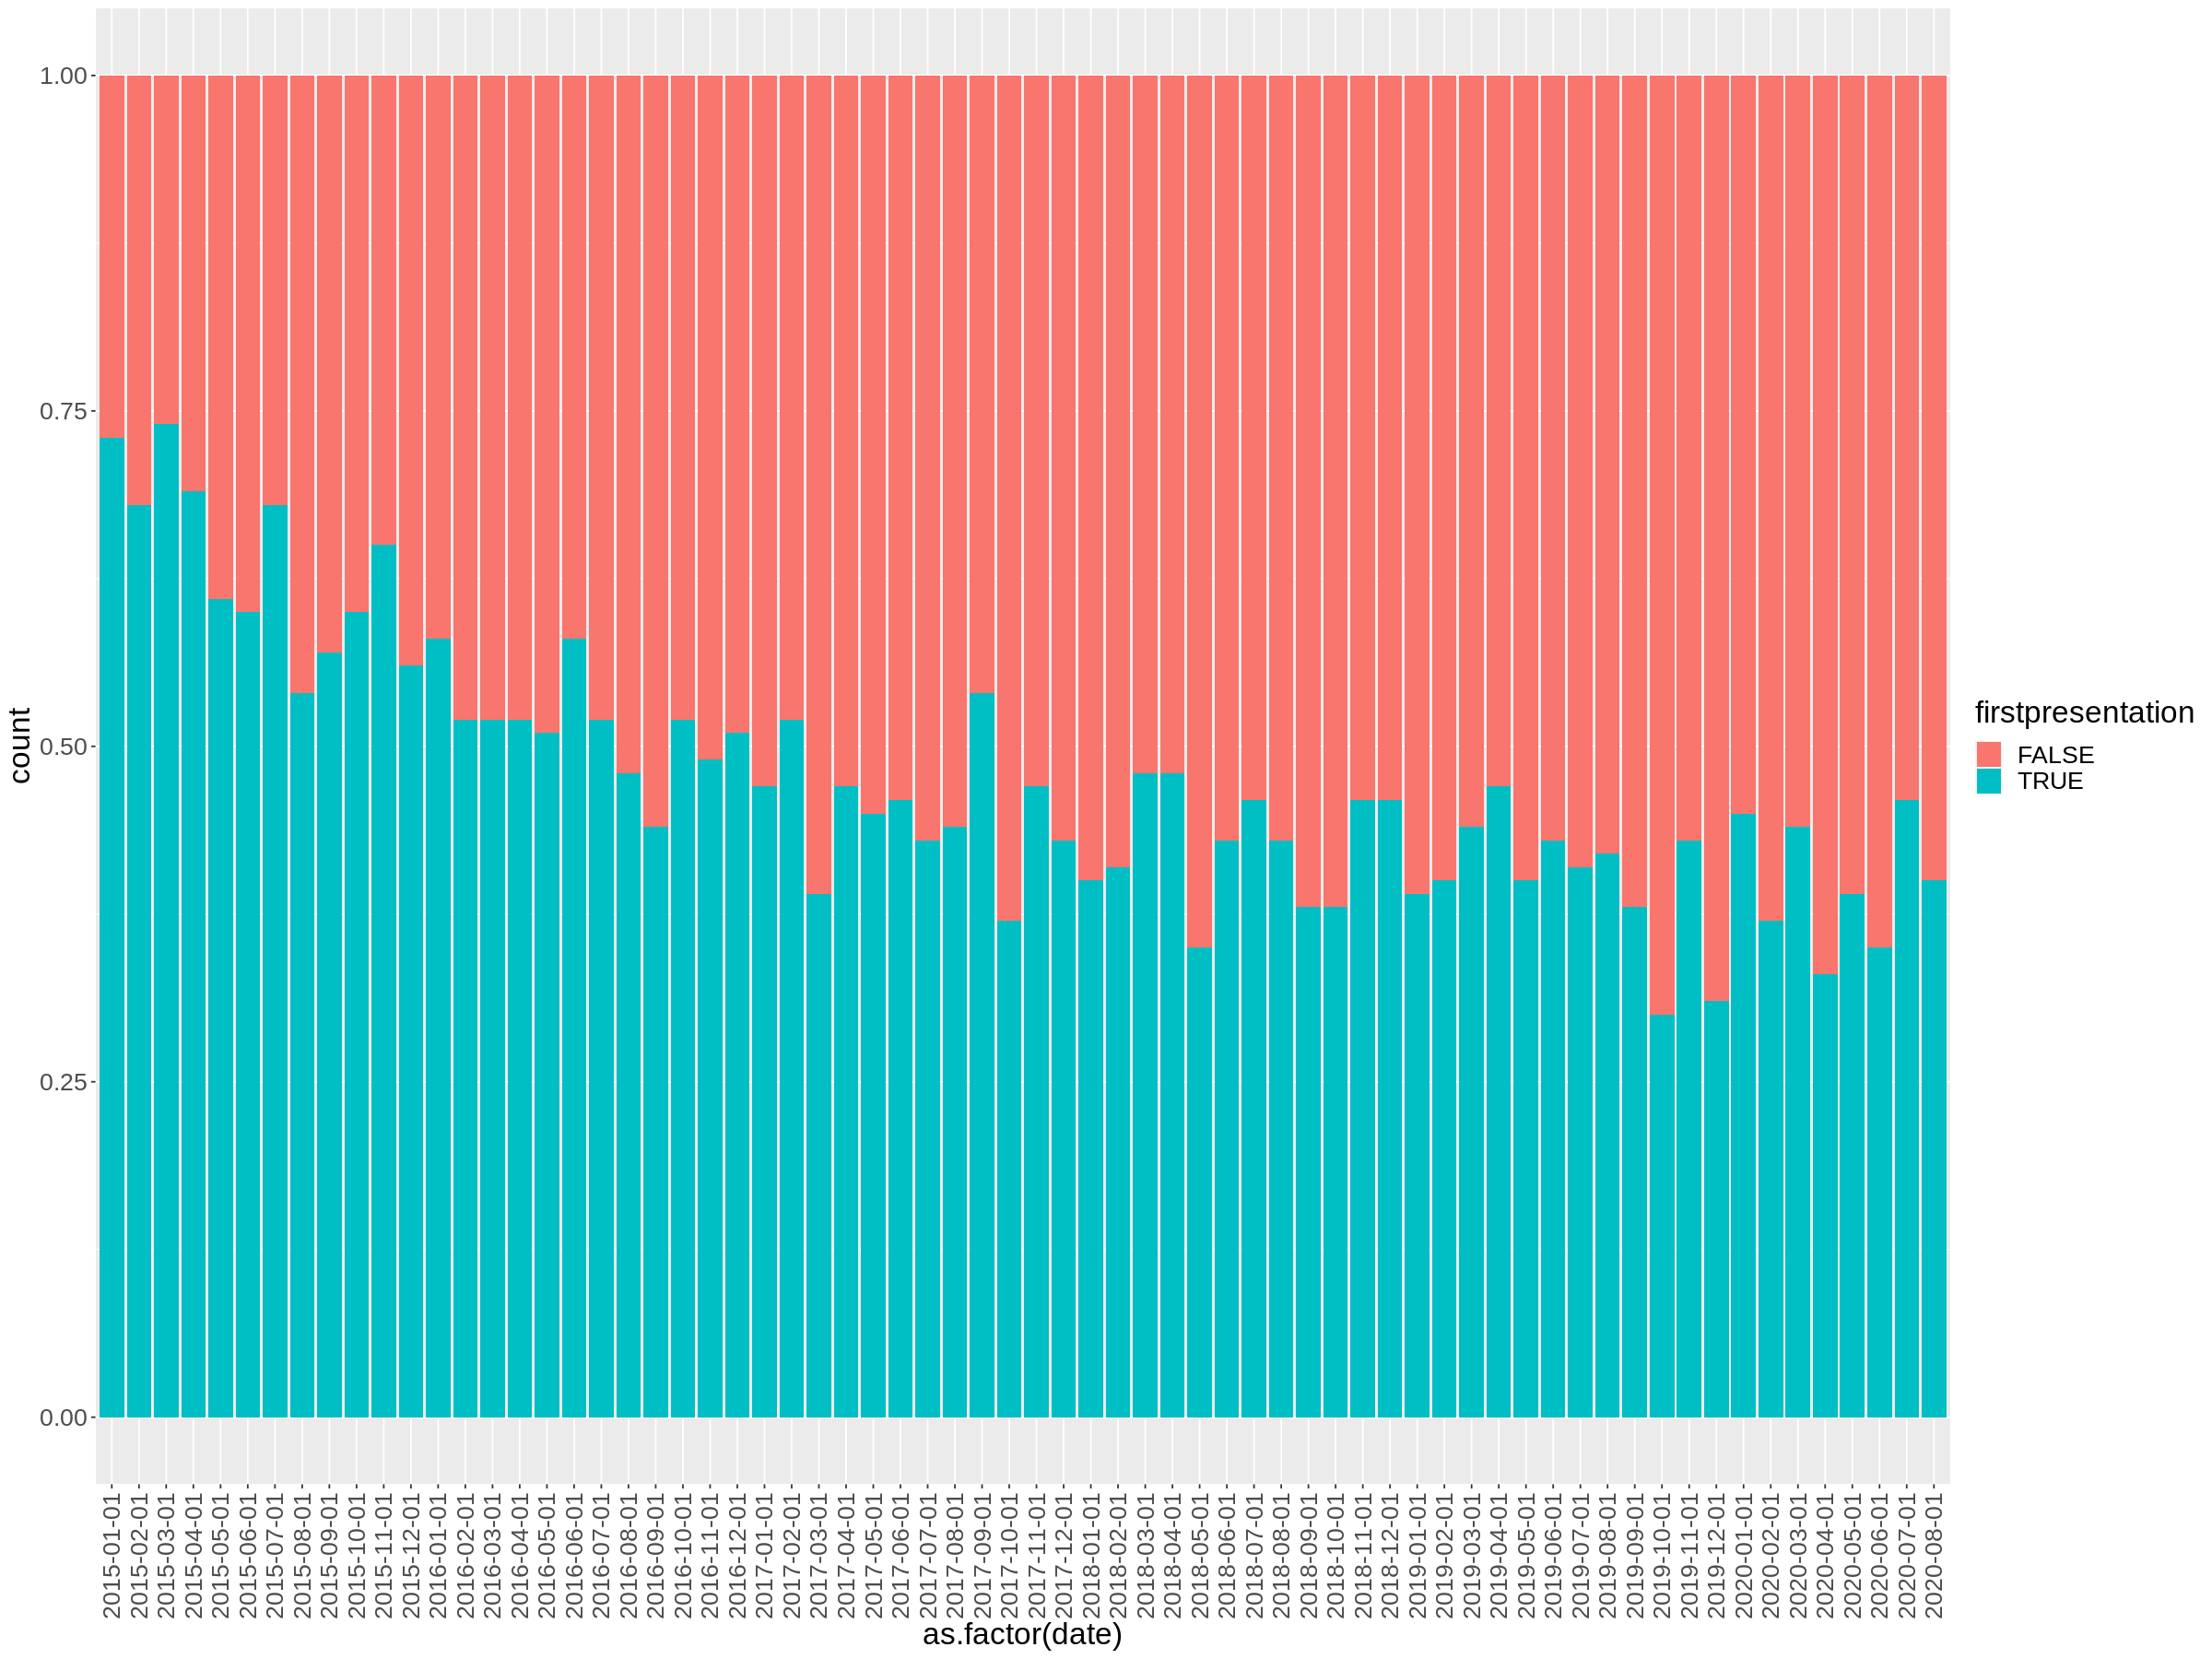

In [ ]:
#subset of 2014 first author names:
sub2014_3=data[data$fd >= "2014-08-01" & data$fd <= "2014-12-01",]$firstAuthorF
### for loop  for extracting first author names of each month except 2014 and putting it in a dataframe :
df3= data.frame(dates= as.character(seq(as.Date("2015-01-01"),as.Date("2020-08-01"),by = "1 month")), names=rep(1,68))
for( time in as.character(seq(as.Date("2015-01-01"),as.Date("2020-08-01"),by = "1 month"))){
     n=data[data$fd==time,]$firstAuthorF
     df3[df3$dates==time,]$names=list(n)
} 

#make new cloumns for proportions defaulted to zero for now:
df3$prop_new=rep(0,68)
df3$prop_rep=rep(0,68)

whole=as.vector(sub2014_3)
for (date in df3$dates){
  current_name=as.vector(unlist(df3[df3$dates==date,]$names))
  diff=setdiff(current_name,whole)
  whole=union(current_name,whole)
  #print(length(whole))
  #print(round(length(diff)/length(current_name),2))
  df3[df3$dates==date,]$prop_new=round(length(diff)/length(current_name),2)
  df3[df3$dates==date,]$prop_rep=round(1-(length(diff)/length(current_name)),2)
}

#subset of df with proportion of new names /t_f : is a new colum indicting wether it appeared new (TRUE) or not (FALSE)
true_df=df3[,c("dates","prop_new")]
true_df$t_f=rep(TRUE,68)
colnames(true_df)[2]="prop"
#subset of df with proportion of repetitive (not new) names
false_df=df3[,c("dates","prop_rep")]
false_df$t_f=rep(FALSE,68)
colnames(false_df)[2]="prop"

##combining the above "true_df" and "false_df" to get final_df:
final_data=rbind(true_df,false_df)
final_data=final_data[order(final_data$dates	),]
#for visulization purpose we need to convert date to factor:
final_data$dates=as.factor(final_data$dates)
#and plot it!
options(repr.plot.width=20, repr.plot.height=15)
ggplot(final_data, aes(x = dates, y = prop, fill = t_f)) +
  geom_bar(stat = "identity", position = "stack")+
    theme(text = element_text(size = 20))+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    xlab("as.factor(date)") + ylab("count")+
    guides(fill=guide_legend(title="firstpresentation"))


4. Create an author level data frame (ie, one row per author) that tracks the number publications they have in NEJM and average number of months between publications. (-1 if they have only one publication)

In [ ]:
df1=data %>% group_by(FA_full)%>% summarise(dif=max(fd)-min(fd))
df2=data %>% count(FA_full)
df_n=cbind(df1,df2) %>% select(c(1,2,4))%>%mutate(month_diff=(round(as.numeric(dif)/(30*(n-1)),2)))
df_n=df_n %>% replace(is.na(.),-1)
df_n=select(df_n,-2)

colnames(df_n)[1]="First Athour name"
colnames(df_n)[2]="number of publication"
colnames(df_n)[3]="average_time_first author"
df_n

First Athour name,number of publication,average_time_first author
<chr>,<int>,<dbl>
A Dorothee Heemskerk,2,5.07
A Emre Eskazan,1,-1.00
A Fuat Kalyoncu,1,-1.00
A Hunter Shain,2,4.03
A Keith Stewart,2,4.03
A Kumar Guddati,1,-1.00
A Laurie Shroyer,2,3.07
A Lianne Messchendorp,1,-1.00
A Marc Gillinov,3,8.13


5. How can you use the dataset to summarize what are the leading institutions that publish in NEJM


In [ ]:
institutes=c()
for (x in list(data[!is.na(data$Email),]$Email)){
  institutes=append(institutes,word(x , 2, sep = fixed('@')))
}

institutes=institutes[!str_detect(institutes,"gmail")]
institutes=institutes[!str_detect(institutes,"hotmail")]
institutes=institutes[!str_detect(institutes,"yahoo")]
institutes=institutes[!str_detect(institutes,"163")]
institutes=institutes[!str_detect(institutes,"188")]
institutes=institutes[!str_detect(institutes,"126")]

new_institutes=c()
#first remove the last dot at the very end of words which has it:
for (char in institutes){
   if (str_sub(char,-1) == "."){
      new_institutes=append(new_institutes,sub('.[^.]*$', '',char))
   }
}

last_institutes=c()
#first remove the last dot at the very end:
for (char in list(new_institutes)){
  #print(char)
   last_institutes=append(last_institutes,sub('.[^.]*$', '',char))
}

institutions_data=data.frame(table(last_institutes))
institutions_data=institutions_data[order(institutions_data$'Freq',decreasing = TRUE),]

In [ ]:
head(institutions_data)

,last_institutes,Freq
,<fct>,<int>
384,mayo,27
308,jhmi,26
528,partners,24
73,bwh.harvard,23
31,aphp,22
431,mgh.harvard,19


Top institutions are mayo clinic(mayo), johns hopkins(jhmi), partners (previos mass general I think), Brigham and Women's Hospital (bwh.harvard), Assistance Publique–Hôpitaux de Paris( France), mgh.harvard	(mass general), 

In [ ]:
institutions_data

,last_institutes,Freq
,<fct>,<int>
384,mayo,27
308,jhmi,26
528,partners,24
73,bwh.harvard,23
31,aphp,22
431,mgh.harvard,19
697,ucsf,17
851,yale,16
183,erasmusmc,15
